# <span style="color:#0073e6">0. 사례준비</span>
<style>
@media print
{
h1 {page-break-before:always}
}
</style>

> **Libaray & Environment Settings** 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, v_measure_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import MiniBatchKMeans

np.random.seed(1234)

> **CHRUN DATA SET LOADING**

In [2]:
churn = pd.read_csv('data/churn_case.csv', index_col='customerID')
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,0,0,Electronic check,29.85,29.85,0
5575-GNVDE,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,1,1,Mailed check,56.95,1889.50,0
3668-QPYBK,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,0,0,Mailed check,53.85,108.15,1
7795-CFOCW,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,1,1,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,0,0,Electronic check,70.70,151.65,1


- - -
# <span style="color:#2EFE9A">.</span>

> **변수 설명**
- customerID : 고객ID
- gender : 성별(1:여성, 0:남성)
- SeniorCitizen : 고령자여부(1:Yes, 0:No)
- Partner : 기혼여부(1:Yes, 0: No)
- Dependents : 부양가족여부(1:Yes, 0:No)
- tenure : 가입기간(월단위)
- PhoneService : 집전화이용여부(1:Yes, 0:No)
- MultipleLines : 다중회선여부(1:Yes, 0:No)
- InternetService : 인터넷이용방식
- OnlineSecurity : 인터넷보안서비스사용여부(1:Yes, 0:No)
- OnlineBackup : 인터넷백업서비스사용여부(1:Yes, 0:No)
- DeviceProtection : 기기방화벽서비스사용여부(1:Yes, 0:No)
- TechSupport : 인터넷기술지원서비스사용여부(1:Yes, 0:No)
- StreamingTV : 스트리밍TV여부(1:Yes, 0:No)
- StreamingMovies : 스트리밍영화여부(1:Yes, 0:No)
- Contract : 약정기간(연단위, 0은 약정없음)
- PaperlessBilling : 지로여부(1:Yes, 0:No)
- PaymentMethod : 지불방법
- MonthlyCharges : 한달요금
- TotalCharges : 총지불요금
- Churn : 이탈여부(1:Yes, 0:No)

- - -
# <span style="color:#2EFE9A">.</span>

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null object
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(16), object(2)
memory usage: 1.1+ MB


- - -
# <span style="color:#2EFE9A">.</span>
> **데이터 준비**
> > 범주형 변수의 처리

In [4]:
churn.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [5]:
cr1 = churn.InternetService=='Fiber optic'
cr2 = churn.InternetService=='DSL'
churn.InternetService = np.where(cr1, 2, np.where(cr2, 1, 0))

In [6]:
churn.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

- - -
# <span style="color:#2EFE9A">.</span>

In [7]:
churn.PaymentMethod = churn.PaymentMethod.str[0]
churn = pd.get_dummies(churn)
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 23 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
PaymentMethod_B     7043 non-null uint8
PaymentMethod_C     7043 non-null uint8
PaymentMethod_E     7043 non-null uint8

In [8]:
churn.to_csv('data/churn_case_ver01.csv')

- - -
# <span style="color:#2EFE9A">.</span>
> > Train/Test 분할 및 Baseline모델 학습

In [9]:
y = churn.Churn
x = churn.drop('Churn', axis='columns')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)
mm = MinMaxScaler()
col = x_train.columns
idx = x_train.index
mm.fit(x_train)
x_train = mm.transform(x_train)
x_test = mm.transform(x_test)

In [10]:
rf = RandomForestClassifier(max_depth=10)

In [11]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10)

In [12]:
rf_pred = rf.predict_proba(x_test)
roc_auc_score(y_test, rf_pred[:,1])

0.8339007111748167

- - -
# <span style="color:#0073e6">1. Clustering 기법의 적용</span>
### 1.1. 군집 수 k의 탐색

In [13]:
results = []
for k in range(2,51):
    kmeans = MiniBatchKMeans(n_clusters=k)
    pred = kmeans.fit_predict(x_train)
    results.append(v_measure_score(y_train, pred))

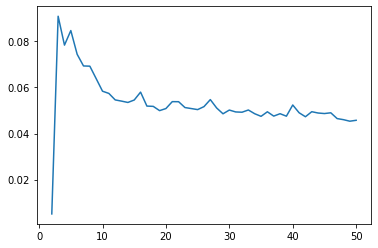

In [14]:
sns.lineplot(x=range(2,51), y=results);

### 1.2. 클러스터링 적용 및 결과의 확인
> **군집별 특성확인**

In [15]:
kmeans = MiniBatchKMeans(n_clusters=3)
clusters = pd.DataFrame(x_train, columns=col, index=idx).join(y_train)
clusters['group'] = kmeans.fit_predict(x_train)
c_summary = pd.DataFrame(clusters.mean(), columns=['overall'])
c_summary = c_summary.join(clusters.groupby('group').mean().T)
c_summary.head()

,overall,0,1,2
gender,0.493712,0.498748,0.480319,0.505510
SeniorCitizen,0.156998,0.040050,0.263830,0.147383
Partner,0.483773,0.460576,0.297872,0.750000
Dependents,0.296755,0.390488,0.114894,0.429063
tenure,0.448191,0.372297,0.266164,0.767399


- - -
# <span style="color:#2EFE9A">.</span>

In [16]:
c_diff = c_summary.subtract(c_summary['overall'], axis=0)
c_diff['overall'] = c_summary['overall']
c_diff

,overall,0,1,2
gender,0.493712,0.005036,-0.013393,0.011798
SeniorCitizen,0.156998,-0.116948,0.106832,-0.009615
Partner,0.483773,-0.023197,-0.185900,0.266227
Dependents,0.296755,0.093734,-0.181861,0.132309
tenure,0.448191,-0.075894,-0.182027,0.319208
PhoneService,0.904665,0.003345,-0.000410,-0.003150
MultipleLines,0.424544,-0.239312,0.025988,0.229726
InternetService,0.610243,-0.420319,0.234437,0.159040
OnlineSecurity,0.288844,-0.165565,-0.104801,0.317905
OnlineBackup,0.341785,-0.260433,-0.048700,0.349675


- - -
# <span style="color:#2EFE9A">.</span>
> **군집 분포 및 Churn확률처리**

In [17]:
clusters.group.value_counts(normalize=True)

1    0.381339
0    0.324138
2    0.294523
Name: group, dtype: float64

In [18]:
churn_prob = clusters.groupby('group')[['Churn']].mean().reset_index()
churn_prob

,group,Churn
0,0,0.129537
1,1,0.492021
2,2,0.121212


- - -
# <span style="color:#2EFE9A">.</span>
> **Test set에 대한 군집 추정 및 예측**

In [19]:
pred = pd.DataFrame({'group':kmeans.predict(x_test)}).merge(churn_prob)
pred

,group,Churn
0,0,0.129537
1,0,0.129537
2,0,0.129537
3,0,0.129537
4,0,0.129537
...,...,...
2108,2,0.121212
2109,2,0.121212
2110,2,0.121212
2111,2,0.121212


In [20]:
roc_auc_score(y_test, pred['Churn'])

0.5009308901630005